In [59]:
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker

from matplotlib.cbook import get_sample_data
from PIL import Image
from io import BytesIO
from matplotlib.ticker import FuncFormatter
from bs4 import BeautifulSoup
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [5]:
def load_data(filepath):
    return pd.read_csv(filepath)

## Teams expenses analysis

In [6]:
df_players_salary = load_data('datasets/players_salary.csv')

In [7]:
def club(teamName):
    return df_players_salary[df_players_salary['Team'] == teamName][['FirstName','LastName','Team','Position','SalaryGuaranteed ($)']]

def totalSalaryClub(teamName):
    return df_players_salary[df_players_salary['Team'] == teamName][salary_column].sum()

# total_salary_by_club = df_players_salary.groupby('Team')[salary_column].sum().sort_values(ascending=False).reset_index()

In [8]:
club('Toronto FC').sort_values("SalaryGuaranteed ($)", ascending = False)

,FirstName,LastName,Team,Position,SalaryGuaranteed ($)
393,Lorenzo,Insigne,Toronto FC,M,15400000.0
103,Federico,Bernardeschi,Toronto FC,M,6295381.0
625,Jonathan,Osorio,Toronto FC,M,1400000.0
655,Raoul,Petretta,Toronto FC,D,856625.0
736,Sigurd,Rosted,Toronto FC,D,768636.0
629,Prince Osei,Owusu,Toronto FC,F,707500.0
415,Sean,Johnson,Toronto FC,GK,683013.0
113,Latif,Blessing,Toronto FC,M-F,665000.0
757,C.J.,Sapong,Toronto FC,F,616667.0
132,Michael,Bradley,Toronto FC,M,614286.0


In [9]:
salary_column = 'SalaryGuaranteed ($)'
totalSalaryClub('Toronto FC')

31672886.0

In [10]:
df_team_expenses = load_data('datasets/MLS_team_colors.csv')
df_team_expenses.head()

,Team,SalaryGuaranteed ($),MainColor,SecondaryColor
0,Inter Miami CF,39419071.0,#231F20,#F7B5CD
1,Toronto FC,31672886.0,#AB1E2D,#3f4743
2,LA Galaxy,25038692.0,#00245d,#ffd200
3,Los Angeles FC,20841863.0,#000000,#C39e6d
4,Chicago Fire,20415828.0,#121F48,#B3272D


In [31]:
def configure_plot():
    return {
        'figsize': (12, 8),
        'face_color': 'white',
        'font_family': "Arial",
        'font_size': 12,
        'grid_color': '#cccccc'
    }

def millions_formatter(x, pos):
    """Converts the number to million format."""
    return f' ${x/1e6:.1f}M'

def setup_axes(fig, ax, config):
    """Configures the axes settings for the plot."""
    ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
    ax.set_facecolor(config['face_color'])
    fig.patch.set_facecolor(config['face_color'])
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)
    ax.grid(True, linestyle='--', which='major', color=config['grid_color'], axis='x', alpha=0.7)

def plot_team_salaries(df, config):
    fig, ax = plt.subplots(figsize=config['figsize'])
    plt.rcParams['font.family'] = config['font_family']

    x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01

    for i, (index, row) in enumerate(df.iterrows()):
        ax.barh(i, row['SalaryGuaranteed ($)'], color=row['MainColor'], align='center', edgecolor='none', height=0.6)
        ax.barh(i, row['SalaryGuaranteed ($)'], color=row['SecondaryColor'], align='center', edgecolor='none', height=0.4)
        ax.text(row['SalaryGuaranteed ($)'] + x_offset, i, millions_formatter(row['SalaryGuaranteed ($)'], None), va='center', ha='left', color='black', fontsize=config['font_size'])

    plt.yticks(range(len(df)), df['Team'], fontsize=config['font_size'])
    plt.xlabel("Total Guaranteed Salary", fontsize=config['font_size'])
    plt.text(0.95, 0.9, "Total Salary MLS 22/23", size=24, fontweight="normal", horizontalalignment='right', transform=ax.transAxes)

    setup_axes(fig, ax, config)
    plt.tight_layout()
    plt.show()

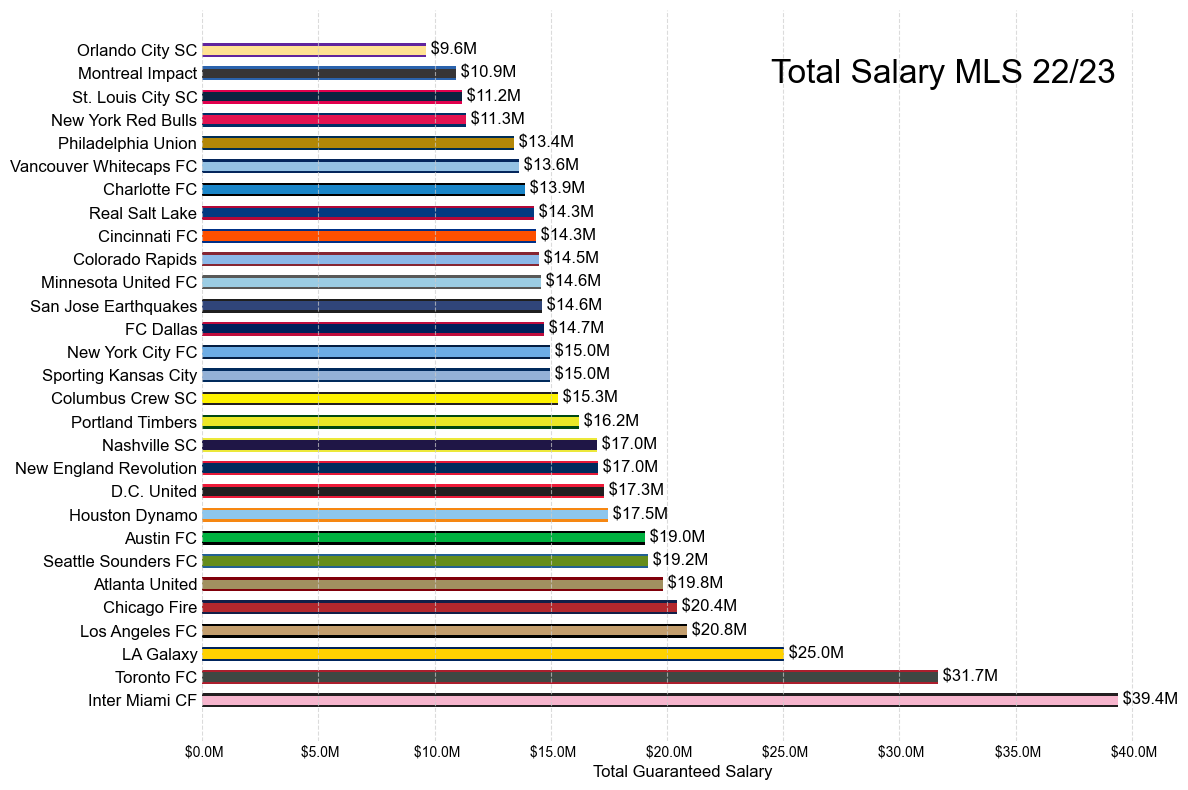

In [32]:
config = configure_plot()
df_team_expenses = load_data('datasets/MLS_team_colors.csv')
plot_team_salaries(df_team_expenses, config)

In [33]:
table23 = load_data('datasets/MLS_23_table.csv')
table23.head()

,Team,SalaryGuaranteed ($),Pos,Pld,W,L,T,GF,GA,GD,Pts,MainColor,SecondaryColor,Logo path
0,Inter Miami C.F.,39419071.0,27,34,9,18,7,41,54,−13,34,#231F20,#F7B5CD,datasets/Teamslogo/Inter Miami C.F..png
1,Toronto FC,31672886.0,29,34,4,20,10,26,59,−33,22,#AB1E2D,#3f4743,datasets/Teamslogo/Toronto FC.png
2,LA Galaxy,25038692.0,26,34,8,14,12,51,67,−16,36,#00245d,#ffd200,datasets/Teamslogo/LA Galaxy.png
3,LAFC,20841863.0,8,34,14,10,10,54,39,+15,52,#000000,#C39e6d,datasets/Teamslogo/LAFC.png
4,Chicago Fire,20415828.0,24,34,10,14,10,39,51,−12,40,#121F48,#B3272D,datasets/Teamslogo/Chicago Fire.png


In [155]:
correlation = table23[['Pos', 'SalaryGuaranteed ($)']].corr().iloc[0, 1]
print(f"Correlation between ranking and salary budget : {correlation}")

Correlation between ranking and salary budget : 0.4808216187293825


In [80]:
def get_image(path, zoom=0.2):
    """Load an image from a path and return an OffsetImage."""
    try:
        return OffsetImage(plt.imread(path), zoom=zoom, alpha=1)
    except Exception as e:
        print(f"Error loading image {path}: {e}")
        return None

def plot_salary_vs_position(df):
    """Plot teams' salary against their final positions with team logos."""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    formatter = ticker.FuncFormatter(millions_formatter)
    ax.yaxis.set_major_formatter(formatter)
    
    ax.set_facecolor('white')
    ax.grid(True, linestyle='--', alpha=0.5)

    ax.set_xlim(30, 0)
    ax.set_ylim(df['SalaryGuaranteed ($)'].min() * 0.95, df['SalaryGuaranteed ($)'].max() * 1.05)

    for index, row in df.iterrows():
        image = get_image(row['Logo path'], zoom=0.2)
        if image:
            ab = AnnotationBbox(image, (row['Pos'], row['SalaryGuaranteed ($)']), frameon=False)
            ax.add_artist(ab)
        else:
            ax.scatter(row['Pos'], row['SalaryGuaranteed ($)'], color='red')

    ax.set_title('Final Standings vs. MLS Teams\' Salary Budgets', fontsize=14)
    ax.set_xlabel('Final Position', fontsize=12)
    ax.set_ylabel('Salary Guaranteed ($)', fontsize=12)

    plt.show()

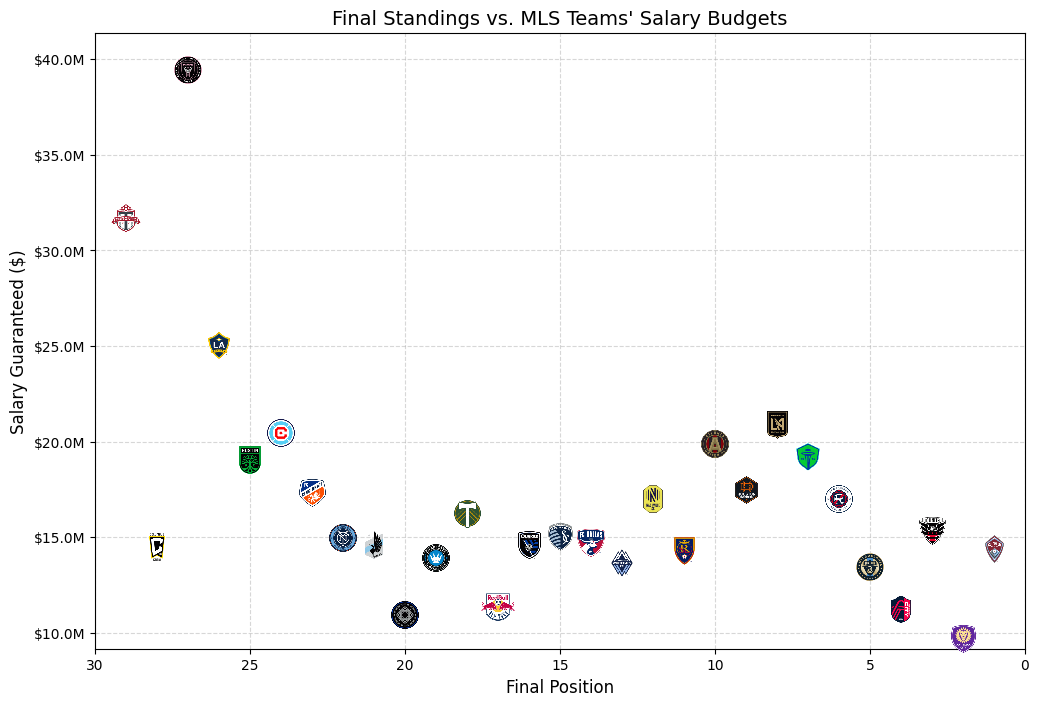

In [81]:
df_teams = load_data('datasets/MLS_23_table.csv')
plot_salary_vs_position(df_teams)

In [78]:
df_team_stats = pd.read_csv('datasets/squad_stats_FBref.csv')
df_team_stats.head()

,Team,SalaryGuaranteed ($),Pos,Pld,W,L,T,GF,GA,GD,...,Ast/90 vs,G+A/90 vs,G-PK/90 vs,G+A-PK/90 vs,xG/90 vs,xAG/90 vs,xG+xAG/90 vs,npxG/90 vs,Diff_Gls,Diff_Gls vs
0,Inter Miami,39419071.0,27,34,9,18,7,41,54,−13,...,1.21,2.71,1.47,2.68,1.53,1.21,2.74,1.51,2.8,-1.2
1,Toronto FC,31672886.0,29,34,4,20,10,26,59,−33,...,1.09,2.76,1.59,2.68,1.59,1.14,2.73,1.51,-5.3,3.0
2,LA Galaxy,25038692.0,26,34,8,14,12,51,67,−16,...,1.32,3.24,1.79,3.12,1.60,1.20,2.80,1.51,-1.2,10.5
3,Los Angeles FC,20841863.0,8,34,14,10,10,54,39,+15,...,0.82,1.94,1.03,1.85,1.12,0.79,1.91,1.00,-2.6,0.0
4,Chicago Fire,20415828.0,24,34,10,14,10,39,51,−12,...,0.88,2.32,1.15,2.03,1.50,1.02,2.52,1.26,-2.2,-2.1


In [45]:
df_team_stats.describe()

,SalaryGuaranteed ($),Pos,Pld,W,L,T,GF,GA,Pts,# Pl,...,Ast/90 vs,G+A/90 vs,G-PK/90 vs,G+A-PK/90 vs,xG/90 vs,xAG/90 vs,xG+xAG/90 vs,npxG/90 vs,Diff_Gls,Diff_Gls vs
count,2.900000e+01,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000,29.000000,29.000000
mean,1.712856e+07,15.000000,34.0,11.965517,11.965517,10.068966,46.862069,46.862069,45.965517,29.482759,...,0.932759,2.264483,1.219310,2.152414,1.311724,0.95000,2.262069,1.211724,0.703448,0.703448
std,6.170083e+06,8.514693,0.0,3.540407,3.364550,2.234966,10.521149,8.416498,9.958782,3.680263,...,0.222949,0.459313,0.259917,0.475647,0.180259,0.15834,0.331063,0.182778,7.807390,4.930335
min,9.642918e+06,1.000000,34.0,4.000000,5.000000,5.000000,26.000000,32.000000,22.000000,23.000000,...,0.530000,1.500000,0.760000,1.350000,0.950000,0.67000,1.650000,0.840000,-11.900000,-8.400000
25%,1.428594e+07,8.000000,34.0,10.000000,10.000000,9.000000,39.000000,39.000000,41.000000,27.000000,...,0.710000,1.820000,1.000000,1.710000,1.200000,0.79000,1.920000,1.080000,-4.800000,-2.700000
50%,1.497934e+07,15.000000,34.0,12.000000,11.000000,10.000000,46.000000,48.000000,44.000000,29.000000,...,0.940000,2.350000,1.240000,2.180000,1.320000,0.99000,2.330000,1.230000,-0.300000,0.300000
75%,1.903855e+07,22.000000,34.0,14.000000,14.000000,12.000000,55.000000,52.000000,52.000000,31.000000,...,1.090000,2.560000,1.440000,2.530000,1.470000,1.05000,2.510000,1.330000,5.500000,3.900000
max,3.941907e+07,29.000000,34.0,20.000000,20.000000,14.000000,67.000000,67.000000,69.000000,39.000000,...,1.320000,3.240000,1.790000,3.120000,1.600000,1.21000,2.800000,1.510000,16.400000,10.900000


C:\Users\Dilhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dilhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dilhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dilhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

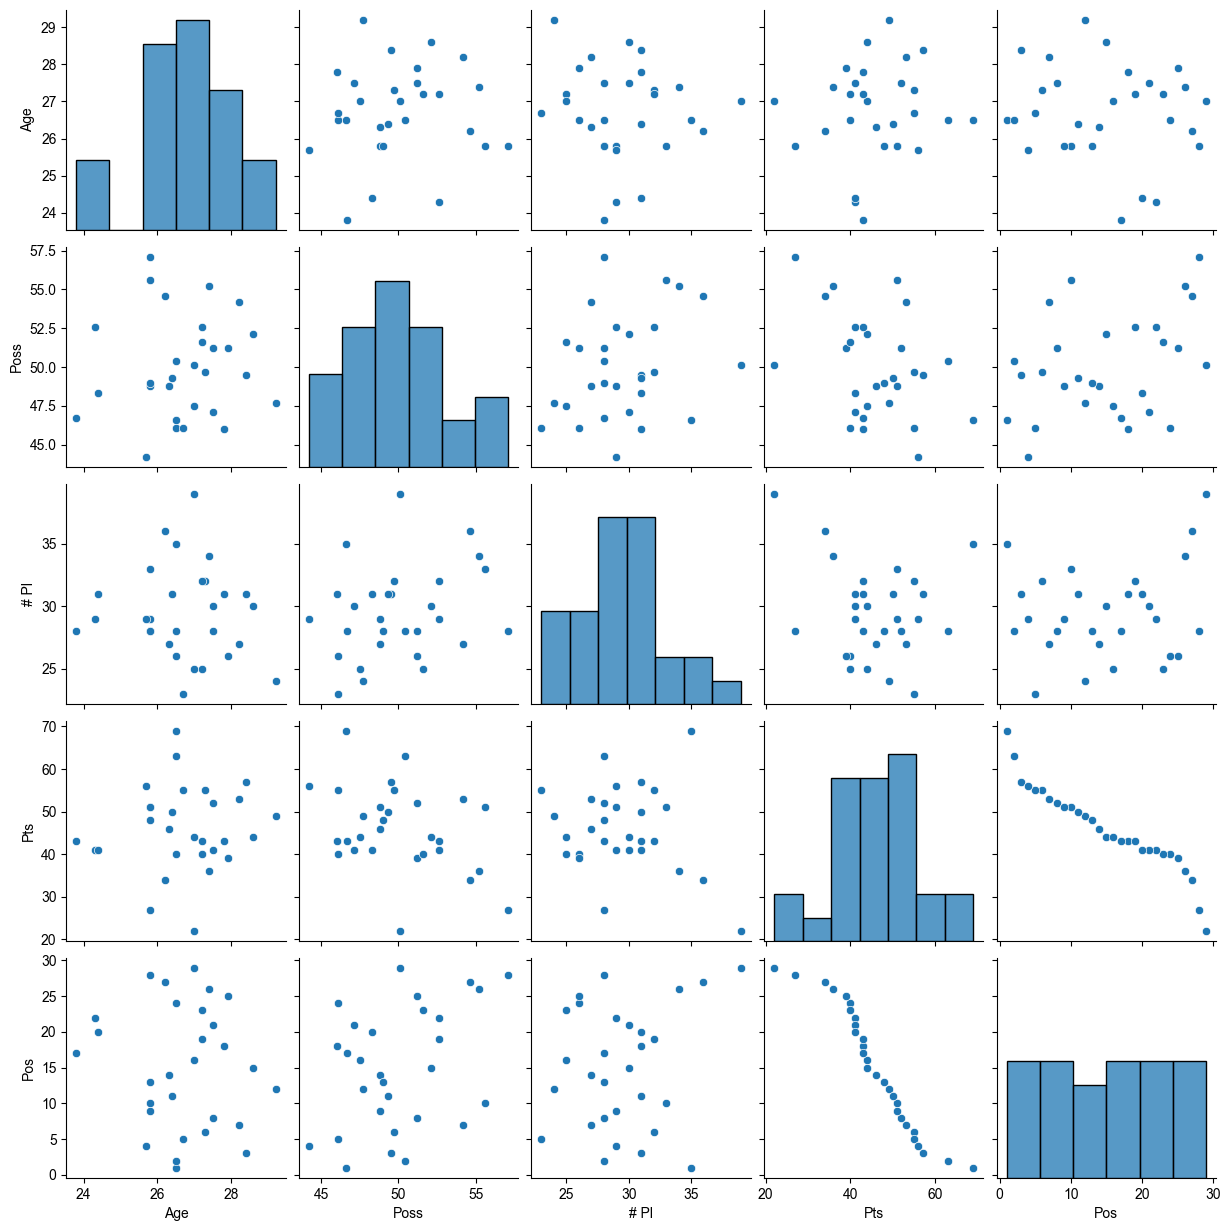

In [46]:
sns.pairplot(df_team_stats[['Age', 'Poss', '# Pl', 'Pts', 'Pos']])

Not enough data to be able to show a correlation between the rankings and any other statistic for this season alone.

In [82]:
FONT_FAMILY = 'sans-serif'
BG_COLOR = '#fafafa'
TICK_COLOR = '#ccc8c8'
AVERAGE_LINE_COLOR = 'black'
TEXT_COLOR = 'black'
ZOOM_LEVEL = 0.2
TITLE_SIZE = 20
AXIS_LABEL_SIZE = 11
ZONE_TEXT_SIZE = 8

In [83]:
def plot_Xgoal_performance(df_team_stats):
    plt.rcParams.update({'font.family': FONT_FAMILY})
    
    PSxG_vs_min = df_team_stats['Diff_Gls vs'].min()
    PSxG_vs_max = df_team_stats['Diff_Gls vs'].max()
    PSxG_min = df_team_stats['Diff_Gls'].min() 
    PSxG_max = df_team_stats['Diff_Gls'].max()
    
    # initial plot
    fig, ax = plt.subplots(figsize=(12, 8), dpi=120)
    fig.set_facecolor(BG_COLOR)
    ax.set_facecolor(BG_COLOR)
    ax.scatter(df_team_stats['Diff_Gls vs'], df_team_stats['Diff_Gls'], c=BG_COLOR)
    
    # plot spines
    for spine in ['left', 'bottom', 'right', 'top']:
        ax.spines[spine].set_visible(False)
        
    # Plot badges
    for index, row in df_team_stats.iterrows():
        image = get_image(row['Logo path'])
        if image:
            ab = AnnotationBbox(image, (row['Diff_Gls vs'], row['Diff_Gls']), frameon=False)
            ax.add_artist(ab)
    
    # Average lines
    ax.axhline(0, color=AVERAGE_LINE_COLOR, linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(0, color=AVERAGE_LINE_COLOR, linestyle='--', linewidth=1, alpha=0.7)
    
    plt.tick_params(axis='x', direction='in', length=6, width=1, colors=TICK_COLOR, grid_alpha=0.2)
    plt.tick_params(axis='y', direction='in', length=6, width=1, colors=TICK_COLOR, grid_alpha=0.2)
    plt.grid(True, linestyle='--', linewidth=0.5, color=AVERAGE_LINE_COLOR)
    
    fig.suptitle('XG Performance, MLS 2023', size=TITLE_SIZE, color=TEXT_COLOR)
    ax.set_xlabel('Expected Goals Difference Against', size=AXIS_LABEL_SIZE, color=TEXT_COLOR)
    ax.set_ylabel('Expected Goals Difference For', size=AXIS_LABEL_SIZE, color=TEXT_COLOR)
    
    ## Axes titles
    ax.text(PSxG_vs_min, PSxG_max - 2, 'Offensive efficiency but not defensive', size=ZONE_TEXT_SIZE, ha='left', va='top')
    ax.text(PSxG_vs_max, PSxG_min + 2, 'Defensive efficiency but not offensive', size=ZONE_TEXT_SIZE, ha='right', va='bottom')
    ax.text(PSxG_vs_max, PSxG_max - 2, 'Defensive and offensive efficiency', size=ZONE_TEXT_SIZE, ha='right', va='top')
    ax.text(PSxG_vs_min, PSxG_min + 2, 'Defensive and offensive inefficiency', size=ZONE_TEXT_SIZE, ha='left', va='bottom')

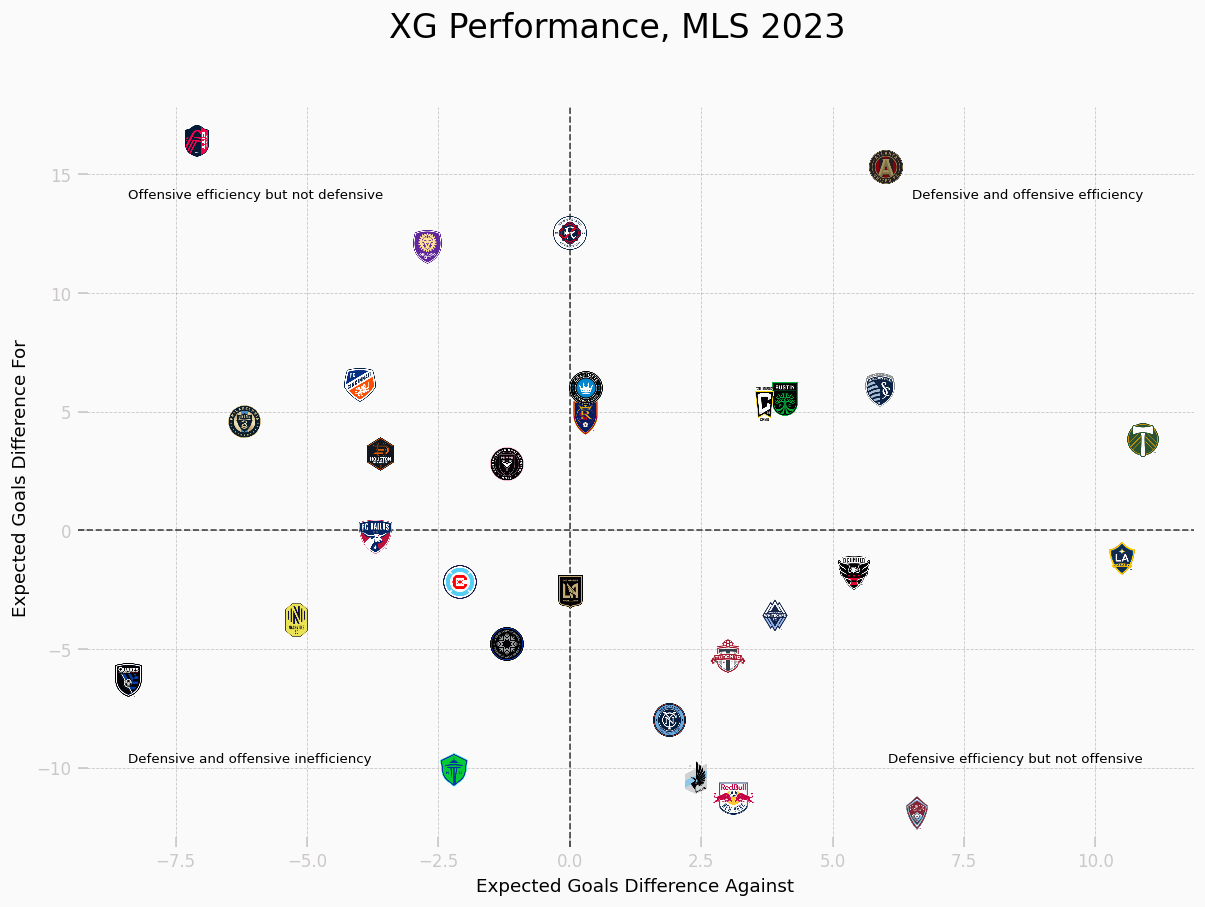

In [84]:
plot_Xgoal_performance(df_team_stats)